In [23]:
import sklearn

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 
import pandas as pd

In [25]:
text=['which book is this', 'this is book and this is math']

In [26]:
c=CountVectorizer()
count=c.fit_transform(text)

In [27]:
ca=count.toarray()

In [28]:
names=c.get_feature_names()

In [29]:
bow=pd.DataFrame(ca,columns=names)

In [30]:
bow

,and,book,is,math,this,which
0,0,1,1,0,1,1
1,1,1,2,1,2,0


In [31]:
bow.shape

(2, 6)

In [32]:
tf = bow.copy()

In [33]:
tf

,and,book,is,math,this,which
0,0,1,1,0,1,1
1,1,1,2,1,2,0


In [34]:
for i,r in enumerate(tf.iterrows()):
    print(r[1].values)
    
    

[0 1 1 0 1 1]
[1 1 2 1 2 0]


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(text)

In [37]:
print(X.toarray())

[[0.         0.44832087 0.44832087 0.         0.44832087 0.63009934]
 [0.39054766 0.27787788 0.55575576 0.39054766 0.55575576 0.        ]]


In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
df=pd.read_csv('spam.tsv',sep='\t')

In [40]:
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [41]:
df.describe

<bound method NDFrame.describe of      label                                            message  length  punct
0      ham  Go until jurong point, crazy.. Available only ...     111      9
1      ham                      Ok lar... Joking wif u oni...      29      6
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155      6
3      ham  U dun say so early hor... U c already then say...      49      6
4      ham  Nah I don't think he goes to usf, he lives aro...      61      2
...    ...                                                ...     ...    ...
5567  spam  This is the 2nd time we have tried 2 contact u...     160      8
5568   ham               Will ü b going to esplanade fr home?      36      1
5569   ham  Pity, * was in mood for that. So...any other s...      57      7
5570   ham  The guy did some bitching but I acted like i'd...     125      1
5571   ham                         Rofl. Its true to its name      26      1

[5572 rows x 4 columns]>

In [42]:
ham=df[df['label']=='ham']
spam=df[df['label']=='spam']

In [43]:
ham


,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2
...,...,...,...,...
5565,ham,Huh y lei...,12,3
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [44]:
spam

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8
...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [45]:
ham=ham.sample(spam.shape[0])

In [46]:
ham.shape

(747, 4)

In [47]:
data=ham.append(spam,ignore_index=True)

In [48]:
data.sample(5)

,label,message,length,punct
1000,spam,BIG BROTHER ALERT! The computer has selected u...,154,5
1144,spam,Ur cash-balance is currently 500 pounds - to m...,139,8
20,ham,Miss call miss call khelate kintu opponenter m...,126,3
136,ham,R ü going 4 today's meeting?,28,2
1234,spam,"You can stop further club tones by replying ""S...",155,14


In [49]:
data.shape

(1494, 4)

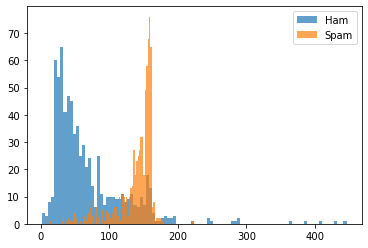

In [50]:
plt.hist(ham['length'], bins = 100, alpha = 0.7, label='Ham')
plt.hist(spam['length'], bins = 100, alpha = 0.7, label = 'Spam')
plt.legend()
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [52]:
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


In [53]:
X=tfidf.fit_transform(data['message'])

In [54]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
X.shape

(1494, 4518)

In [56]:
 X_train,X_test,Y_train,Y_test=train_test_split(X,data['label'],test_size=0.2,random_state = 0, stratify = data['label'])

In [57]:
X_train.shape, X_test.shape

((1195, 4518), (299, 4518))

In [58]:
Y_train.shape, Y_test.shape

((1195,), (299,))

In [59]:
rf=RandomForestClassifier(n_estimators=100, n_jobs= -1)

In [60]:
rf.fit(X_train,Y_train)

RandomForestClassifier(n_jobs=-1)

In [61]:
y_pred = rf.predict(X_test)

In [62]:
confusion_matrix(Y_test, y_pred)

array([[147,   3],
       [ 17, 132]], dtype=int64)

In [63]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.98      0.94       150
        spam       0.98      0.89      0.93       149

    accuracy                           0.93       299
   macro avg       0.94      0.93      0.93       299
weighted avg       0.94      0.93      0.93       299



In [64]:
svm=SVC(C=1000,gamma='auto')

In [65]:
svm.fit(X_train,Y_train)

SVC(C=1000, gamma='auto')

In [66]:
y_pred = svm.predict(X_test)

In [67]:
confusion_matrix(Y_test, y_pred)

array([[147,   3],
       [ 18, 131]], dtype=int64)

In [68]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.89      0.98      0.93       150
        spam       0.98      0.88      0.93       149

    accuracy                           0.93       299
   macro avg       0.93      0.93      0.93       299
weighted avg       0.93      0.93      0.93       299



In [69]:
svm

SVC(C=1000, gamma='auto')

In [70]:
def predict(x):
    x=tfidf.transform([x])
    x=x.toarray()
    pred=svm.predict(x)
    return pred

In [71]:
predict('Hello ,How are you?')

array(['ham'], dtype=object)

In [72]:
predict('You have won tickets to IPL 2021')

array(['spam'], dtype=object)

In [78]:
pickle_out = open("classifier.pkl","wb")
pickle.dump(svm, pickle_out)
pickle_out.close()

In [80]:
 import pickle as pkl

In [81]:
clf=pkl.load((open('classifier.pkl','rb' )))

In [82]:
def predict(x):
    x=tfidf.transform([x])
    x=x.toarray()
    pred=clf.predict(x)
    return pred

In [94]:
p=predict('You have won tickets to IPL 2021')

In [95]:
type(p)

numpy.ndarray

In [88]:
p.tostring

<function ndarray.tostring>

In [89]:
p

array(['spam'], dtype=object)

In [90]:
str(p)

"['spam']"

In [91]:
np.array_str(p)

"['spam']"

In [92]:
pickle_out = open("tfidf.pkl","wb")
pickle.dump(tfidf, pickle_out)
pickle_out.close()